# Simulation Optimsiation using DES model of homeless response system

In [1]:
import datetime
print('Current version of this notebook updated ' + str(datetime.date.today()))

Current version of this notebook updated 2023-10-23


## Ranking & Selection

First we employ a Ranking & Selection algorithm based on the Kim & Nelson procedure. Details of this procedure can be found in section 9.3.2 (page 247) of 'Foundation and Methods of Stochastic Simulation' - Edition 2 (2021). The Python code for this procedure is found in the ranking_and_selection.py file in the GitHub repository. Below we import this module, and some others

In [10]:
# modules from this repository
import ranking_and_selection as rs
import simulation_model as sim
import queueing_model as qm

# external packages
import numpy as np
import random
import matplotlib.pyplot as plt

### Testing using Inventory System

In order to test our KN procedure, we test it on a simulation model which has already been analysed using the KN algorithm in STOR-606 module - this is an $(s,S)$ inventory system where stock is replenished to a level of $S$ when it reaches $s$. 

In [3]:
solutions = [i for i in range(1600)]
k=np.array([i for i in range(1600)])

def simulate(solution):
    # one replication of simulating the cost of the inventory policy
    out=rs.InventorySystem(solution)[0]
    return out

In [4]:
random.seed(1)
opt_sols = []
for i in range(10):
    spc = rs.SolutionSpace(solutions)
    spc.optimise_rs(0.05, 50, 1, simulate, False)
    s,S = rs.get_sS_system(k[spc.active][0])
    opt_sols.append((s,S))

In [5]:
print('(s,S) for the optimal solution found at each iteration of the algorithm')
print(opt_sols)

(s,S) for the optimal solution found at each iteration of the algorithm
[(19, 51), (18, 54), (16, 51), (21, 56), (16, 54), (21, 53), (13, 50), (16, 51), (17, 49), (20, 50)]


The above illustrates that this KN algorithm can return different solutions when it is run at different times (i.e. with different starting seeds) - this is likely due to the difference between the true best and other good solutions being less than the 'delta' indiffference zone parameter used when running the algorithm above. 

### Developing a discrete solution space for the homeless response system

In [71]:
build_rate_options = {'housing' : [12, 24], 'shelter' : [12,24]}
annual_budget = 36
accommodation_budgets = {'housing' : 96, 'shelter' : 96}
simulation_length = 5

sols = rs.generate_solution_space(build_rate_options, annual_budget, accommodation_budgets, simulation_length)

Below we print ten of the 221 feasible solutions

In [72]:
sols[0:9]

[{'housing': [12, 12, 12, 12, 12], 'shelter': [12, 12, 12, 12, 12]},
 {'housing': [12, 12, 12, 12, 12], 'shelter': [24, 12, 12, 12, 12]},
 {'housing': [24, 12, 12, 12, 12], 'shelter': [12, 12, 12, 12, 12]},
 {'housing': [12, 12, 12, 12, 12], 'shelter': [12, 24, 12, 12, 12]},
 {'housing': [12, 12, 12, 12, 12], 'shelter': [24, 24, 12, 12, 12]},
 {'housing': [24, 12, 12, 12, 12], 'shelter': [12, 24, 12, 12, 12]},
 {'housing': [12, 24, 12, 12, 12], 'shelter': [12, 12, 12, 12, 12]},
 {'housing': [12, 24, 12, 12, 12], 'shelter': [24, 12, 12, 12, 12]},
 {'housing': [24, 24, 12, 12, 12], 'shelter': [12, 12, 12, 12, 12]}]

Below we initialise a solution space object with the solutions we have generated

In [73]:
spc = rs.SolutionSpace(sols)

We next set a seed and then look for an optimal solution using the KN algorithm. A line of text is printed below whenever solutions are removed from the candidate list by the algorithm. 

In [6]:
random.seed(1)
spc.optimise_rs(0.05, 10, 2, sim.simulate_as_is, False)

The details of the optimal solution are given below, followed by the following 20 solutions in decreasing order of the iteration number at which the KN algorithm removed them from the candidate list. 

In [7]:
np.array(spc.solutions)[spc.active][0].solution

{'housing': [50, 50, 50, 25, 25], 'shelter': [25, 25, 25, 25, 25]}

In [8]:
sort_index = np.flip(np.argsort(np.array(spc.eliminate)))
n = 0 # count of solutions printed
for i in sort_index:
    print(str(spc.solutions[i].solution) + ' eliminated after ' + str(spc.eliminate[i]))
    n+=1
    if n>20:
        break

{'housing': [25, 50, 25, 25, 50], 'shelter': [25, 25, 50, 50, 25]} eliminated after 333
{'housing': [50, 50, 25, 25, 25], 'shelter': [25, 25, 25, 50, 50]} eliminated after 174
{'housing': [50, 25, 25, 25, 50], 'shelter': [25, 25, 25, 25, 25]} eliminated after 174
{'housing': [25, 25, 50, 25, 50], 'shelter': [25, 25, 25, 50, 25]} eliminated after 173
{'housing': [50, 25, 25, 25, 50], 'shelter': [25, 25, 50, 50, 25]} eliminated after 172
{'housing': [50, 25, 25, 25, 25], 'shelter': [25, 25, 50, 25, 25]} eliminated after 131
{'housing': [50, 50, 25, 25, 25], 'shelter': [25, 25, 25, 50, 25]} eliminated after 115
{'housing': [50, 25, 50, 25, 25], 'shelter': [25, 25, 25, 50, 25]} eliminated after 109
{'housing': [50, 25, 50, 25, 25], 'shelter': [25, 25, 25, 25, 25]} eliminated after 101
{'housing': [50, 25, 25, 50, 50], 'shelter': [25, 50, 25, 25, 25]} eliminated after 98
{'housing': [25, 25, 50, 50, 25], 'shelter': [25, 25, 25, 25, 25]} eliminated after 92
{'housing': [50, 25, 50, 25, 50], 

Next steps: 

* To identify good solutions using the analytical model
* To explore (potentially using data from the simulated solutions) why certain solutions are performing better than others. 

In [ ]:
# simulation options
number_reps = 1
initial_build_time = 63/365 # 9 weeks in years
end_of_simulation = 5 + initial_build_time - 0.25 # in years
initial_demand = 120
initial_capacity = {'housing' : 40, 'shelter' : 15}
arrival_rates = [35.0400, 42.0048, 46.2528, 46.2528, 41.6100] # in 1/year. One constant rate per year.
service_mean = {'housing' : (1/52)*(0+300+400)/3, 'shelter' : 0.0} # in years

# adjust arrival rates to include re-entries
reentry_rate = 0.17 # the proportion of those leaving accommodation which re-enter the system some time later
arrival_rate_reentries = (initial_capacity['housing']*reentry_rate)/service_mean['housing'] # assuming re-entries from the initial number of servers
arrival_rates = [i+arrival_rate_reentries for i in arrival_rates]#
time_btwn_changes_in_build_rate = (6*63)/365 # in years
time_btwn_building = 63/365 # in years. 63/365 years = 9 weeks.
reentry_rate = 0 # set this to zero now we have accounted for re-entries using an uplift to arrival rate

# additional params for analytical model
max_in_system = 1000
num_annual_buildpoints = 6
build_frequency_weeks = 9
d = 1 # days

# model analytically
outputs = []
for s in range(len(sols)):
    q = qm.queue(arrival_rates, service_mean['housing'], initial_capacity['housing'], initial_capacity['shelter'], [int(sols[s]['housing'][i]/num_annual_buildpoints) for i in range(len(sols[s]['housing']))], [int(sols[s]['shelter'][i]/num_annual_buildpoints) for i in range(len(sols[s]['shelter']))], initial_demand, max_in_system, num_annual_buildpoints, build_frequency_weeks)
    q.model_dynamics(simulation_length, d)
    outputs.append(q.num_unsheltered_avg)
    print('done ' + str(s) + ' at time ' + str(datetime.datetime.now()))

done 0 at time 2023-10-23 16:22:46.561109
done 1 at time 2023-10-23 16:22:56.292309
done 2 at time 2023-10-23 16:23:05.978307
done 3 at time 2023-10-23 16:23:15.803150
done 4 at time 2023-10-23 16:23:25.555050
done 5 at time 2023-10-23 16:23:35.396626
done 6 at time 2023-10-23 16:23:45.367403
done 7 at time 2023-10-23 16:23:55.171308
done 8 at time 2023-10-23 16:24:04.890582
done 9 at time 2023-10-23 16:24:14.844254
done 10 at time 2023-10-23 16:24:24.621915
done 11 at time 2023-10-23 16:24:34.314729
done 12 at time 2023-10-23 16:24:44.070288
done 13 at time 2023-10-23 16:24:53.893081
done 14 at time 2023-10-23 16:25:03.526758
done 15 at time 2023-10-23 16:25:13.274372
done 16 at time 2023-10-23 16:25:22.967292
done 17 at time 2023-10-23 16:25:32.559267
done 18 at time 2023-10-23 16:25:42.279379
done 19 at time 2023-10-23 16:25:52.175963
done 20 at time 2023-10-23 16:26:01.985754
done 21 at time 2023-10-23 16:26:11.873744
done 22 at time 2023-10-23 16:26:21.676736
done 23 at time 2023-

#### Build rates of 15 or 30 - outcomes appear to be one of three values

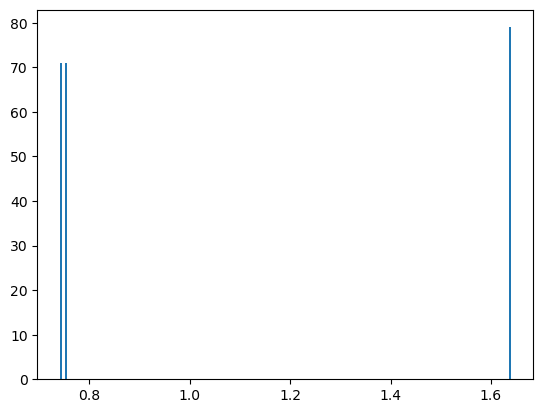

[1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.741513231381519,
 1.639795489668889,
 0.7510030329091073,
 0.7

In [49]:
plt.hist(outputs,200)
plt.show()
outputs

In [61]:

# split out the different two types and sum the housing and shelter of the five yrs for each one
out_v_good = [(sum(sols[i]['housing']),sum(sols[i]['shelter'])) for i in range(len(outputs)) if outputs[i]<0.75]
out_good = [(sum(sols[i]['housing']),sum(sols[i]['shelter'])) for i in range(len(outputs)) if outputs[i]>=0.75 and outputs[i]<1.5]
out_bad = [(sum(sols[i]['housing']),sum(sols[i]['shelter'])) for i in range(len(outputs)) if outputs[i]>=1.5]

# split out the different two types and sum yr 1 for each type
out_v_good = [sols[i]['housing'][0]+sols[i]['shelter'][0] for i in range(len(outputs)) if outputs[i]<0.75]
out_good = [sols[i]['housing'][0]+sols[i]['shelter'][0] for i in range(len(outputs)) if outputs[i]>=0.75 and outputs[i]<1.5]
out_bad = [sols[i]['housing'][0]+sols[i]['shelter'][0] for i in range(len(outputs)) if outputs[i]>=1.5]

# split out the different two types and sum yr 2 for each type
out_v_good = [sols[i]['housing'][1]+sols[i]['shelter'][1] for i in range(len(outputs)) if outputs[i]<0.75]
out_good = [sols[i]['housing'][1]+sols[i]['shelter'][1] for i in range(len(outputs)) if outputs[i]>=0.75 and outputs[i]<1.5]
out_bad = [sols[i]['housing'][1]+sols[i]['shelter'][1] for i in range(len(outputs)) if outputs[i]>=1.5]

# look at the very good solutions
out_v_good = [sols[i] for i in range(len(outputs)) if outputs[i]<0.75]

In [62]:
out_v_good

[{'housing': [30, 15, 15, 15, 15], 'shelter': [15, 15, 15, 15, 15]},
 {'housing': [30, 15, 15, 15, 15], 'shelter': [15, 30, 15, 15, 15]},
 {'housing': [30, 30, 15, 15, 15], 'shelter': [15, 15, 15, 15, 15]},
 {'housing': [30, 15, 15, 15, 15], 'shelter': [15, 15, 30, 15, 15]},
 {'housing': [30, 15, 15, 15, 15], 'shelter': [15, 30, 30, 15, 15]},
 {'housing': [30, 30, 15, 15, 15], 'shelter': [15, 15, 30, 15, 15]},
 {'housing': [30, 15, 30, 15, 15], 'shelter': [15, 15, 15, 15, 15]},
 {'housing': [30, 15, 30, 15, 15], 'shelter': [15, 30, 15, 15, 15]},
 {'housing': [30, 30, 30, 15, 15], 'shelter': [15, 15, 15, 15, 15]},
 {'housing': [30, 15, 15, 15, 15], 'shelter': [15, 15, 15, 30, 15]},
 {'housing': [30, 15, 15, 15, 15], 'shelter': [15, 30, 15, 30, 15]},
 {'housing': [30, 30, 15, 15, 15], 'shelter': [15, 15, 15, 30, 15]},
 {'housing': [30, 15, 15, 15, 15], 'shelter': [15, 15, 30, 30, 15]},
 {'housing': [30, 15, 15, 15, 15], 'shelter': [15, 30, 30, 30, 15]},
 {'housing': [30, 30, 15, 15, 15],

In [63]:
q1 = qm.queue(arrival_rates, service_mean['housing'], initial_capacity['housing'], initial_capacity['shelter'], [30,15,15,15,15], [15,15,15,15,15], initial_demand, max_in_system, num_annual_buildpoints, build_frequency_weeks)
q1.model_dynamics(simulation_length, d)

In [64]:
q2 = qm.queue(arrival_rates, service_mean['housing'], initial_capacity['housing'], initial_capacity['shelter'], [30,15,15,15,15], [15,30,15,15,15], initial_demand, max_in_system, num_annual_buildpoints, build_frequency_weeks)
q2.model_dynamics(simulation_length, d)

In [65]:
q1.num_unsheltered_avg

0.741513231381519

In [66]:
q2.num_unsheltered_avg

0.741513231381519

#### Build rates of 25 or 50 (results no longer output)

Below illustrates that when the build rate options are 25 or 50, then in year 1, we either build 75 units of accommodation, which immediately clears the queue, or we build 50 units which doesn't immediately clear the queue, but at the next year does. 

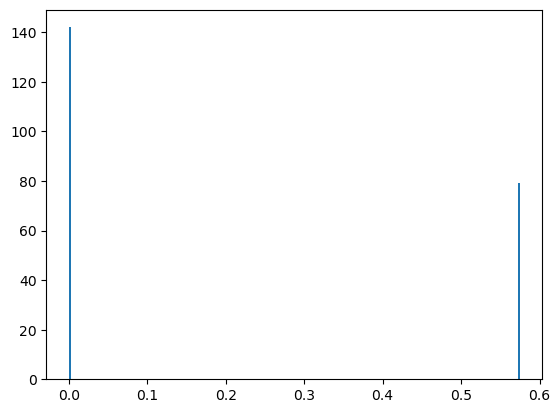

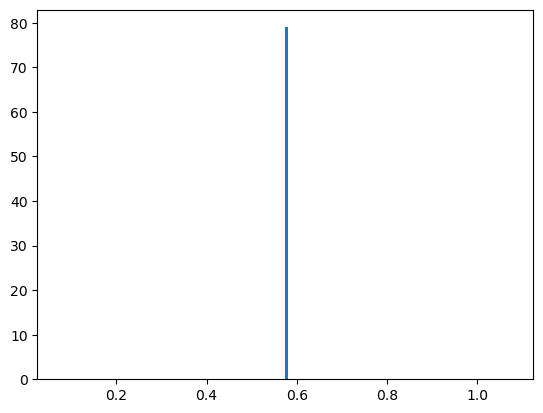

In [35]:
# Two distinct 'types' of output
plt.hist(outputs,200)
plt.show() 

# split out the different two types and sum the housing and shelter of the five yrs for each one
out_good = [(sum(sols[i]['housing']),sum(sols[i]['shelter'])) for i in range(len(outputs)) if outputs[i]<0.1]
out_bad = [(sum(sols[i]['housing']),sum(sols[i]['shelter'])) for i in range(len(outputs)) if outputs[i]>=0.1]

# split out the different two types and sum yr 1 for each type
out_good = [sols[i]['housing'][0]+sols[i]['shelter'][0] for i in range(len(outputs)) if outputs[i]<0.1]
out_bad = [sols[i]['housing'][0]+sols[i]['shelter'][0] for i in range(len(outputs)) if outputs[i]>=0.1]

# split out the different two types and return output
out_good = [outputs[i] for i in range(len(outputs)) if outputs[i]<0.1]
out_bad = [outputs[i] for i in range(len(outputs)) if outputs[i]>=0.1]

# plot just the bad ones
plt.hist(out_bad,200)
plt.show() 

#### Identifying the change as a result of changing specific dimensions...

In [ ]:
for yr in 1:simulation_length:
        for housing in ['housing', 'shelter']:
            # calculate range of improvement
            # find all solutions where we have both 25 and 50 for this one
            for [sols[i] for i in range(len(sols)) if sols[i]['housing']==15]:
                
# this is probably a better way of doing it - transform the dict into a pd;dataframe.        
my_list = []
for i in range(len(sols)):
    my_dict = {}
    for index, element in enumerate(sols[i]['housing']):
        my_dict[index] = element
    for index, element in enumerate(sols[i]['shelter']):
        my_dict[index+5] = element
    my_list.append(my_dict)
df = pd.DataFrame.from_dict(my_list)
print(df)